<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Principal Component Analysis (PCA)

_Author: Kiefer Katovich (SF) _

_Modified for DSI-EAST by Justin Pounders (ATL)_

---

### Learning Objectives

- Describe what PCA does and what it is used for in data science.
- Practice computing PCA with sklearn.
- Interpret PCA results graphically.

### Lesson Guide
- [Motivation](#motivation)
- [What is PCA?](#whatispca)
    - [Eigenvalues and Eigenvectors](#eigenpairs)
    - [Principal Components](#pcs)
- [Manual PCA Codealong](#manual-codealong)
    - [1. Basic EDA](#basic-eda)
    - [2. Subset and Normalize](#subset)
    - [3. Find the Correlation Matrix](#corr)
    - [4. Eignenvalues and Eigenvectors](#eigen)
    - [5. Explained Variance](#var)
    - [6. Projection Matrix W](#projection)
    - [7. Transformed Matrix Z](#transformed)
    - [8-12. Plot and Interpret Principal Components](#plot-components)
- [More Reading](#more-reading)

# PCA = Principle Component Analysis

**Goals**: 

- *Transform* original variable/features into new, "high-performance" features
- *Reduce* the dimensionality of the data
- *Eliminate* multicollinearity


<a id="motivation"></a>
## Motivation

### Dimensionality Reduction

Dimensionality reduction reduces the number of random variables that you are considering for analysis until you are left with the most important variables.

> Dimensionality reduction is not an end goal in itself, but a tool to form a dataset with more parsimonious features for further visualization and/or modelling.

### Reducing Colinearity in Input

To get a quick summary of our data, we can calculate a covariance matrix, an unstandardized correlation matrix.

The diagonal elements in a covariance matrix show us the variance of each of our features.

The off-diagnal elements show the covariance, the amount of colinearity and redundancy between our variables.

## Motivating Example

Say that I want to predict **age** from *stress*, *income* and *health*.

1. Three-dimensional data
2. Multicollinearity probably exists

*PCA* will give me one or two **super-predictor** variables called *components* (hopefully).


**Check:**

**What would an 'ideal' covariance matrix look like?**

**What can we do to try to remove any redundancies and preserve the signal?**

Enter PCA!

<a id="whatispca"></a>
## What is PCA?

---

PCA is the quintessential "dimensionality reduction" algorithm. 

_Dimensionality reduction_ is the process of combining or collapsing the existing features (columns in X) into fewer features. 

These hopefully:

- Retain the signal in the original data, and
- Reduce noise.

---

**Essentially...**

- PCA finds *linear combinations* of current predictor variables that...
- create new "principal components". The principal components explain...
- the maximum possible amount of variance in your predictors.

$$ PC1 = w_{1,1}(\text{stress}) + w_{2,1}(\text{income}) + w_{3,1}(\text{health})$$

$$ PC2 = w_{1,2}(\text{stress}) + w_{2,2}(\text{income}) + w_{3,2}(\text{health})$$

$$ PC3 = w_{1,3}(\text{stress}) + w_{2,3}(\text{income}) + w_{3,3}(\text{health})$$

This is cool because...

- $$PC1$$ is better than $$PC2$$ is better than $$PC3$$  
- All of these are *uncorrelated*

---

**Visually...**

> Think of PCA as a coordinate transformation.  The old axes are the original variables (columns). The new axes are the principal components from PCA.

**The new axes (principal components) become the  most concise, informative descriptors of our data as a whole.**


![eigenvalue](./images/eigenvalue.png)

![orthogonal eigenvectors](./images/eigenvectors_orthogonal.png) 

![transformed XY](./images/transformed_xy.png) 

![PCA coord transform](./images/pca_coordinate_transformation.png) 

<a id="pcs"></a>
### Principal Components

---

- We are looking for new *directions* in feature space
- Each consecutive direction tries to maximize *remaining variance*
- Each direction is *orthogonal* to all the others

**These new *directions* are the "principal components", i.e. the new coordinate system for your data.**

> Applying PCA to your data *transforms* your original data columns (variables) onto the new principal component axes.


(Did you catch that?  The *variables* define the *cordinate system*.)

(CP1) **Let's review...**

**The PCA transformation creates new variables that...**
1. Optimize "explained variance", and
2. Are uncorrelated.

Creating these variables is a well-defined mathematical process. In essence, **each component is created as a weighted sum of your original columns, such that all components are orthogonal (perpendicular) to each other**.

#### Example Continued

The inputs `stress`, `income` and `health`...

...can be *replaced* with 3 *new* variables...

- `PC1` $\rightarrow$ most variance
- `PC2`
- `PC3` $\rightarrow$ least variance (noise?)

---

Mathematically:

$$ PC1 = w_{1,1}(\text{stress}) + w_{2,1}(\text{income}) + w_{3,1}(\text{health})$$

$$ PC2 = w_{1,2}(\text{stress}) + w_{2,2}(\text{income}) + w_{3,2}(\text{health})$$

$$ PC3 = w_{1,3}(\text{stress}) + w_{2,3}(\text{income}) + w_{3,3}(\text{health})$$

The weights are called *loadings*... they are coefficients indicating how heavily each of the input data are weighted

e.g.

$$ PC1 = 0.01(\text{stress}) - 0.54(\text{income}) + 0.71(\text{health})$$

> We will see how to get these values from `sklearn`


### Capturing variance

The total variance of your data gets redistributed among the principal components:

$$\text{var}(PC1) > \text{var}(PC2) > \text{var}(PC3)$$


> #### Interpreting PCA: Signal v. Noise

> PCA attempts to *maximize signal* (high variance) while *isolating noise* (low variance)

> - Most variance captured in first several principal components
> - Noise isolated to last several principal compoments
> - This done simultaneously across *all input variables*


### Isolating variance

There is no covariance between principal components

$$\text{covar}(PC1, PC2) = 0$$

$$\text{covar}(PC1, PC3) = 0$$

$$\text{covar}(PC2, PC3) = 0$$


**Two assumptions that PCA makes:**
1. **Linearity:** The data does not hold nonlinear relationships.
2. **Large variances define importance:** The dimensions are constructed to maximize remaining variance.

**PRINCIPAL COMPONENT TRANSFORMATION OF DATA: PC1 VS PC2**

[setosa.io has an extremely nice interactive visualization for PCA](http://setosa.io/ev/principal-component-analysis/)

---

![setosa pc1](./images/setosa_pc1.png) 

(CP2) **Let's review...**

### Down the rabit hole...


![](./images/math-formula-chalkboard.jpg)

PCA relies on the...

**Eigenvalue decomposition of the covariance matrix**
This diagonalizes the covariance matrix, therby eliminating covariance.

**The principal component transformation**
This transforms each input variable onto a new orthogonal basis in which the new variables are maximally variant.

$$ \mathbf{Z = XW} $$

> *Introduction to Statistical Lerning* section 10.2 has a great overview that is of medium technical complexity.


### Why would we want to do PCA?

---

- We can reduce the number of dimensions (remove less important components), while losing mostly noise rather than signal.
- Since we are assuming our variables are interrelated (at least in the sense that they together explain a dependent variable), the information of interest should exist along directions with largest variance.
- The directions of largest variance should have the highest signal-to-noise ratio.
- Correlated predictor variables (also referred to as "redundancy" of information) are combined into independent variables. Our predictors from PCA are guaranteed to be independent.

---

[Good paper on PCA](http://arxiv.org/pdf/1404.1100.pdf)

[Nice site on performing PCA](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#pca-vs-lda)

<a id="manual-codealong"></a>
## PCA Codealong

---

**DATA**

We are going to be using a simple 75-row, 4-column dataset with demographic information. It contains:

    age (limited to 20-65)
    income
    health (a rating on a scale of 1-100, where 100 is the best health)
    stress (a rating on a scale of 1-100, where 100 is the most stressed)
    
All of the variables are continuous.

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style('white')

demo = pd.read_csv('./datasets/simple_demographics.csv')

<a id="basic-eda"></a>
### 1. Basic EDA

Make a seaborn pairplot for the dataset:

1. age vs. income
2. age vs. health
3. age vs. stress

---

<a id="subset"></a>
### 2. Subset and normalize

Subset the data to only include:

    income
    health
    stress

We will be comparing the principal components to age specifically, so we are leaving age out.

---

In [2]:
demo_noage = demo[['health', 'income', 'stress']]
demo_noage = (demo_noage - demo_noage.mean())/demo_noage.std()

<a id="corr"></a>
### 3. Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

---

In [3]:
demo_noage.corr()

,health,income,stress
health,1.000000,0.192037,0.527663
income,0.192037,1.000000,-0.347925
stress,0.527663,-0.347925,1.000000


<a id="eigen"></a>
### 4. Calculate the principal components and associated explained variances

---

In [7]:
from sklearn.decomposition import PCA

X=demo_noage.values

pca=PCA()
pca=pca.fit(X)

print(pca.explained_variance_)
print(pca.components_)

[ 1.53570401  1.1579261   0.26636989]
[[-0.6187659   0.25173885 -0.74414804]
 [ 0.5126449   0.84716255 -0.13968116]
 [-0.59525118  0.46791364  0.65324793]]


Interpreting the "components": recall that

$$ PC1 = w_{1,1}(\text{health}) + w_{2,1}(\text{income}) + w_{3,1}(\text{stress})$$

$$ PC2 = w_{1,2}(\text{health}) + w_{2,2}(\text{income}) + w_{3,2}(\text{stress})$$

$$ PC3 = w_{1,3}(\text{health}) + w_{2,3}(\text{income}) + w_{3,3}(\text{stress})$$


<a id="var"></a>
### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{\text{variance of } PC_i}{\text{total variance}}\bigg)$$

---

In [9]:
var_exp=pca.explained_variance_ratio_
print('Explained Variance ',var_exp)

Explained Variance  [ 0.51881892  0.39119125  0.08998983]


In [10]:
cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)

Cumulative explained variance:  [ 0.51881892  0.91001017  1.        ]


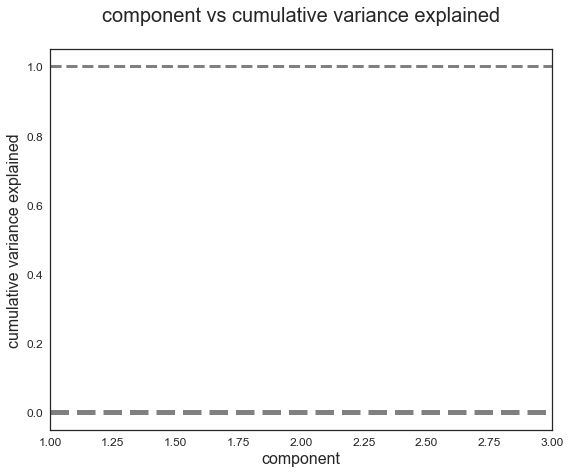

In [11]:
plt.figure(figsize=(9,7))

# HERE IS THE BASIC PLOT

# Plot the cumulative explained variance
# component_number = [1,2,3]
# plt.plot(component_number, cum_var_exp, lw=7)

# NOW MAKE IT LOOK PRETTY

# Add horizontal lines at y=0 and y=100
plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=3, color='grey', ls='dashed')

# Set the x and y axis limits
ax = plt.gca()
ax.set_xlim([1,3])
ax.set_ylim([-0.05,1.05])

# Label the axes
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

# Make the tick labels bigger
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
# Add title
ax.set_title('component vs cumulative variance explained\n', fontsize=20)

plt.show()

<a id="transformed"></a>
### 6. Construct the Transformed Data Set $Z$

---

In [12]:
Z = None # Do the transformation here!

features_pca = ['PC'+str(i+1) for i in range(pca.n_components_)]
Z = pd.DataFrame(Z, columns=features_pca)
Z.head(5)

,PC1,PC2,PC3


In [13]:
Z.corr()

""


In [14]:
np.cov(Z.values.T)

//anaconda/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
//anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


AttributeError: 'float' object has no attribute 'shape'

<a id="plot-components"></a>
### 7. Plot Principal Component 1 vs 2

PC1 is the first column in $Z$, and PC2 is the second.

Notice how they are un-correlated.

---

In [ ]:
fig = plt.figure(figsize=(9,7))

ax = fig.gca()
ax = sns.regplot(Z.iloc[:,0], Z.iloc[:,1],
                 fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 2', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()


### 8. Plot age vs principal component 1 with regplot

Look how tight the relationship is. PC1 took the shared variance out of income, health, and stress, which are intuitively directly related to increasing age. 

This principal component, or more specifically the column weighting matrix $W$, is essentially **capturing the latent age variance embedded in these variables.**

---

In [ ]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()
ax = sns.regplot(Z.iloc[:,0], demo.age.values,
                 fit_reg=True, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('age', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs age\n', fontsize=20)

plt.show()

### 9. Concatenate PC1 and PC2 to the dataset, then melt it with PC1 and PC2 and index variables

```python
melted_df = pd.melt(df, id_vars=['PC1','PC2'])
```

**This is all for the sake of making a nice plot!**


In [14]:
demo_pcs = demo_noage.copy()
demo_pcs['PC1'] = Z.iloc[:,0]
demo_pcs['PC2'] = Z.iloc[:,1]

demo_pcs = pd.melt(demo_pcs, id_vars=['PC1','PC2'])

In [ ]:
demo_pcs.head()

### 10. Use lmplot to check out PC1 vs all 4 variables

Make the `col` keyword argument "variable" and the `hue` keyword argument "variable" as well, assuming that's what you called them in the melt command (those are the defaults).

In [ ]:
pc1 = sns.lmplot(x="PC1", y="value", row="variable", hue="variable", 
                 data=demo_pcs, size=7, scatter_kws={'s':50})

### 11. Use lmplot to do the same for PC2

Notice how PC2 captures the variance of income, which was not captured well by PC1. This makes sense, as the variance each principal component captures has to be orthogonal to the other components.

---

In [ ]:
pc1 = sns.lmplot(x="PC2", y="value", row="variable", hue="variable", 
                 data=demo_pcs, size=7, scatter_kws={'s':50})

### 12. Putting it all together

Now build out a base-line linear regression model predicting `age` from `health`, `income` and `stress`.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

features = ['health', 'income', 'stress']

X = demo[features]
y= demo['age']
ss=StandardScaler()
Xs=ss.fit_transform(X)
lr=LinearRegression()
print(cross_val_score(lr,Xs,y,cv=5).mean())

0.855597445128


Repeat the above model, but reduce the dimensionality to 2 (instead of 3) using PCA.  
- How does your $R^2$ compare?
- How were the principal components chosen?

In [20]:
from sklearn.decomposition import PCA

features = ['health', 'income', 'stress']

X = demo[features]
y= demo['age']
ss=StandardScaler()
Xs=ss.fit_transform(X)
pca=PCA(n_components=3)
Xt=pca.fit_transform(Xs)
lr=LinearRegression()
print(cross_val_score(lr,Xt,y,cv=5).mean())

0.855597445128


Do all the preprocessing in a pipeline??

In [32]:
from sklearn.pipeline import Pipeline



<a id="more-reading"></a>
### More useful links, reading, and references for images

---

[PCA 4 dummies](https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/)

[Stackoverflow making sense of PCA](http://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

[PCA and spectral theorem](http://stats.stackexchange.com/questions/217995/what-is-an-intuitive-explanation-for-how-pca-turns-from-a-geometric-problem-wit)

[PCA in 3 steps: eigendecomposition and SVD](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#pca-vs-lda)

[Tutorial on PCA](http://arxiv.org/pdf/1404.1100.pdf)

[PCA math and examples](http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf)

### Easter Egg.  Like math?

PCA works by taking the singular value decomposition (SVD) of the data matrix, $X$.  This is equivalent to the eigen-decomposition of the matrix $X^T X$.  

Well... if the data are centered/standardized, then the matrix $X^T X$ is nothing more than the *covariance matrix*.  Therefore PCA is really the eigenvalue decomposition of the covariance matrix!

From this perspecive, the *eigenvalues* of $X^T X$ are the variances of the principal components.  The *eigenvectors* of $X^T X$ contain the weights (aka loadings) needed to tranform the original data into principal components.

So by defining a matrix $W$ whose columns are the eigenvectors of $X^T X$ (arranged in order of decreasing eigenvalue), you can transform your original data $X$ into the *transformed* principal components by

$$Z = XW.$$

> This is what `sklearn`'s `PCA` does "under the hood."  There is another module called `TruncatedSVD` that essentially does the same thing.  `TruncatedSVD`, however, can handle sparse matrices and plays a little nicer with memory, features that can be important in natural language processing!

Now let's do this using `numpy`!

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style('white')

demo = pd.read_csv('./datasets/simple_demographics.csv')

demo_noage = demo[['health','income','stress']]
demo_noage = (demo_noage - demo_noage.mean()) / demo_noage.std()

### Start by getting the correlation matrix, $X^T X$

In [24]:
demo_noage_corr = np.corrcoef(demo_noage.values.T)
demo_noage_corr

array([[ 1.        ,  0.19203672,  0.52766325],
       [ 0.19203672,  1.        , -0.3479248 ],
       [ 0.52766325, -0.3479248 ,  1.        ]])

### Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)


In [25]:
eig_vals, eig_vecs = np.linalg.eig(demo_noage_corr)

print(eig_vals)
print(eig_vecs)

[ 0.26996948  1.55645677  1.17357375]
[[ 0.59525118 -0.6187659  -0.5126449 ]
 [-0.46791364  0.25173885 -0.84716255]
 [-0.65324793 -0.74414804  0.13968116]]


### Calculate the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg)$$


In [26]:
tot = sum(eig_vals)

var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]
print('Explained variance:            ', var_exp)

cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)

Explained variance:             [0.51881892276071451, 0.39119125069425753, 0.08998982654502799]
Cumulative explained variance:  [ 0.51881892  0.91001017  1.        ]


<a id="projection"></a>
### Construct the Projection Matrix $W$

This is simply a matrix of our top 2 eigenvectors (assuming we only want 2 principal components.)

The eigenvectors are concatenated as columns.

1. Start by ordering the eigenvectors by their corresponding eigenvalues biggest to smallest.
- Concatenate the eigenvectors together. `np.stack()` is useful for this.


In [27]:
# With numpy

value_vector_pairs = [[eig_vals[i], eig_vecs[:,i]] for i in range(len(eig_vals))]
value_vector_pairs.sort(reverse=True)
value_vector_pairs

[[1.5564567682821437, array([-0.6187659 ,  0.25173885, -0.74414804])],
 [1.1735737520827727, array([-0.5126449 , -0.84716255,  0.13968116])],
 [0.269969479635084, array([ 0.59525118, -0.46791364, -0.65324793])]]

In [28]:
eig_vec_1 = value_vector_pairs[0][1]
eig_vec_2 = value_vector_pairs[1][1]
weight_2d_projection = np.stack((eig_vec_1, eig_vec_2), 
                                axis=1)

print('Weight data 2d PCA projection matrix:\n', weight_2d_projection)

Weight data 2d PCA projection matrix:
 [[-0.6187659  -0.5126449 ]
 [ 0.25173885 -0.84716255]
 [-0.74414804  0.13968116]]


### Construct the Transformed 2D Matrix $Z$

To do this, we take the dot product of our 3D demographic matrix $X$ with the projection matrix $W$


In [29]:
Z = demo_noage.dot(weight_2d_projection)

*And now you know the **rest** of the story.  Good day!*